<center>

# <span style="color:red"> Studio dimensione blocchi </span>

</center>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

## Esempio di determinazione dimensione blocco

In [6]:
obs = np.loadtxt("sim/err_t2.25_size100_seed1.out")
ene = obs[:, 1]
blk = obs[:, 3]; dimblk = np.mean(blk)/(100*100)

err = np.zeros(200)

#Ciclo per le varie lunghezze dei blocchi
for i in range(5, 1001, 5):
    m = 0
    m2 = 0
    
    # Ciclo per l'errore a lunghezza del blocco fissata
    for j in range(0, math.floor(len(ene)*dimblk/i)):

        # Stima nel singolo blocco
        mblk = np.sum(ene[i * j : i*j + int(i/dimblk)-1])/i

        m = m * j/(j+1) +  mblk/(j+1)
        m2 = m2 * j/(j+1) +  mblk*mblk/(j+1)
    
    err[math.floor(i/5)-1] = math.sqrt((m2 - m**2)/(math.floor(len(ene)*dimblk/i)-1))

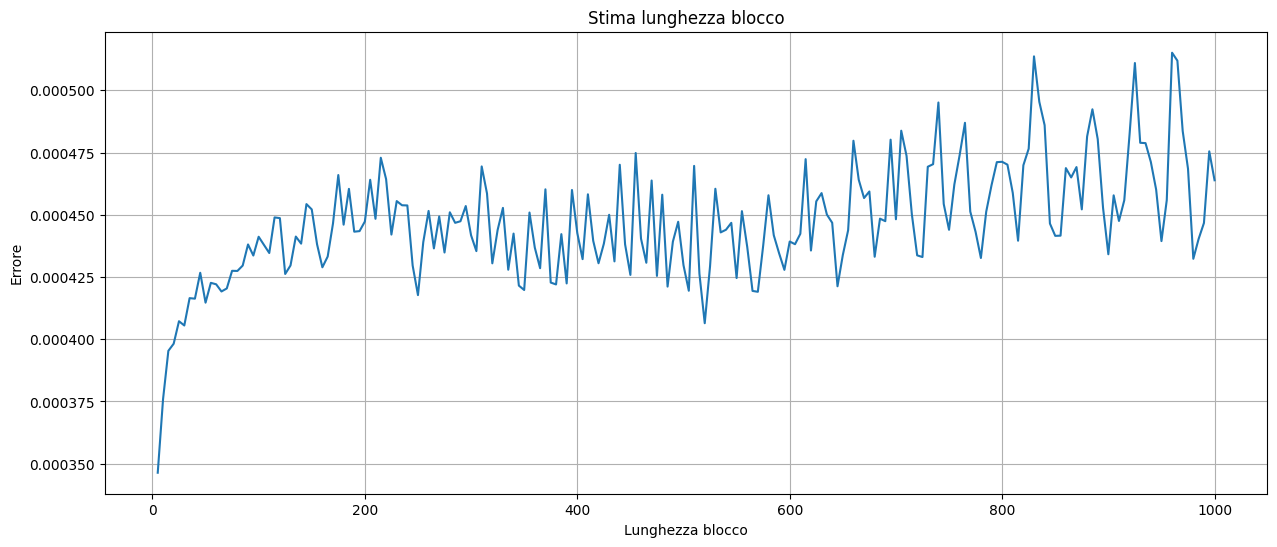

In [7]:
fig = plt.figure(figsize=(15, 6))

plt.plot(np.linspace(5, 1000, 200), err)
plt.title("Stima lunghezza blocco")
plt.ylabel('Errore')
plt.xlabel('Lunghezza blocco')
plt.grid()

plt.show()             

## Studio sistematico spazio dei parametri

In [4]:
def err_lblk(x, lmax, sp_camp):
    err = np.zeros(200)

    #Ciclo per le varie lunghezze dei blocchi
    for i in range(5, lmax, sp_camp):
        m = 0
        m2 = 0

        # Ciclo per l'errore a lunghezza del blocco fissata
        for j in range(0, math.floor(len(x)/i)):
            mblk = 0
            m2blk = 0

            # Stima nel singolo blocco
            for k in range(0, i):
                mblk += x[i * j + k]/i

            m = m * j/(j+1)+  mblk/(j+1)
            m2 = m2 * j/(j+1)+  mblk*mblk/(j+1)

        err[math.floor(i/sp_camp)-1] = math.sqrt((m2 - m**2)/(math.floor(len(x)/i)-1))

    return err

In [7]:
temp_t = np.array(['2.1', '2.15', '2.2', '2.25'])
size_t = np.array(['100', '200', '300', '400', '500'])
seed_t = np.array(['1', '2', '3', '4'])

lmax = 1001
sp_camp = 5

err = np.zeros(shape = (4, 200))

for size in size_t:
    for i in range(0, len(temp_t)):
        for j in range(0, len(seed_t)):
        
            # Leggo il file
            fname = 'sim/err_t' + temp_t[i] + '_size' + size + '_seed'+ seed_t[j] +'.out'
            obs = np.loadtxt(fname)
            magn = obs[:, 2]

            # Calcolo dell'errore e memorizzazione
            err[j, :] = err_lblk(magn, lmax, sp_camp)
        print("Calcolato errore: N = " + size + ", T = " + temp_t[i])

        fout = 'err/errM_size' + size + '_t' + temp_t[i] + '.dat'
        np.savetxt(fout, err.T, delimiter=' ', fmt='%.8f')

Calcolato errore: N = 100, T = 2.1
Calcolato errore: N = 100, T = 2.15
Calcolato errore: N = 100, T = 2.2
Calcolato errore: N = 100, T = 2.25
Calcolato errore: N = 200, T = 2.1
Calcolato errore: N = 200, T = 2.15
Calcolato errore: N = 200, T = 2.2
Calcolato errore: N = 200, T = 2.25
Calcolato errore: N = 300, T = 2.1
Calcolato errore: N = 300, T = 2.15
Calcolato errore: N = 300, T = 2.2
Calcolato errore: N = 300, T = 2.25
Calcolato errore: N = 400, T = 2.1
Calcolato errore: N = 400, T = 2.15
Calcolato errore: N = 400, T = 2.2
Calcolato errore: N = 400, T = 2.25
Calcolato errore: N = 500, T = 2.1
Calcolato errore: N = 500, T = 2.15
Calcolato errore: N = 500, T = 2.2
Calcolato errore: N = 500, T = 2.25
